# Figure 4A

## Caption
Cumulative stress days (CSD) for each summer month, calculated separately for each river plume in North (blue), East (green), West (purple) regions. Average phosphorous concentration within each tributary plume (in ugPL-1) shown beside each bar. 

In [1]:
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

import numpy as np
import xarray as xr
import pandas as pd
import cmocean
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes
from matplotlib.ticker import AutoMinorLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.lines import Line2D

# Load data

In [2]:
%run _load_directories.ipynb

DIRECTORIES
>> {dir_raw}
/local/data/artemis/workspace/gloege/MITgcm-Michigan-Phosphorus/data/raw

>> {dir_clean}
/local/data/artemis/workspace/gloege/MITgcm-Michigan-Phosphorus/data/clean

>> {dir_figs}
/local/data/artemis/workspace/gloege/MITgcm-Michigan-Phosphorus/results/figures


In [3]:
### Load data
ds_avgTP = xr.open_dataset(f'{dir_clean}/avg_TP_within_plume_all_rivers_MJJA.nc')
ds_csd = xr.open_dataset(f'{dir_clean}/cumulative_stress_days_all_rivers_JJA.nc')

# Generate Figure

/usr/local/python/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


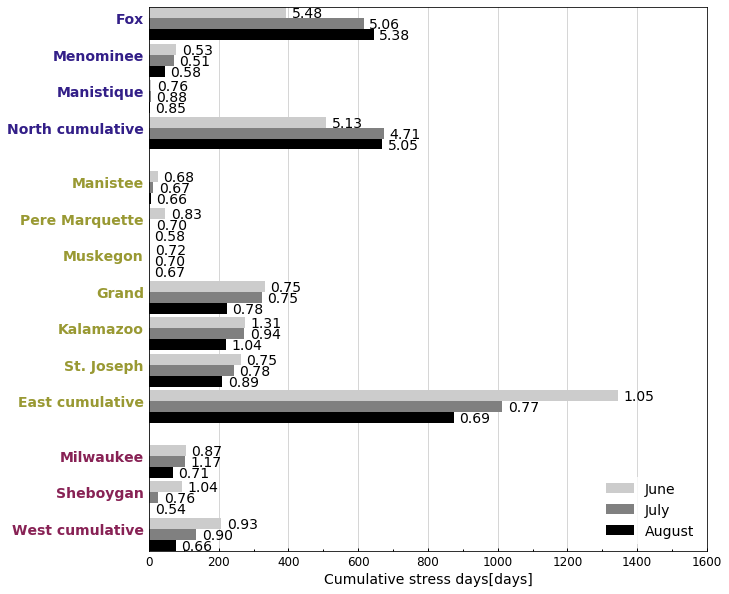

In [4]:
# Create figure
#fig = plt.figure(figsize=(6, 6*1.618))
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

rivers = ['Fox','Menominee','Manistique', 'north',
          'Manistee','Pere_Marquette','Muskegon','Grand' ,'Kalamazoo', 'St_Joseph', 'east',
           'Milwaukee','Sheboygan','west' ] 

riversTP = ['Fox','Menominee','Manistique', 'north',
          'Manistee','PereMarquette','Muskegon','Grand' ,'Kalamazoo', 'StJoseph', 'east',
           'Milwaukee','Sheboygan','west']

rivers_labels = ['Fox','Menominee','Manistique', 'North cumulative',
                 'Manistee','Pere Marquette','Muskegon','Grand' ,'Kalamazoo', 'St. Joseph', 'East cumulative',
                'Milwaukee','Sheboygan','West cumulative' ] 

pos = [0, 1, 2, 3, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 12, 13, 14]

# Variables 
width = 0.3
fontsize = 14

# Plot the points 
#for riv_num, riv in enumerate(rivers):
for riv_num, riv, rivTP in zip(pos, rivers, riversTP):
    for month in ['june', 'july', 'august']:
        # X location
        xval = riv_num-width if month=='june' else riv_num if month=='july' else riv_num+width if month=='august' else -1
        
        # Bar plot for June/July/August
        ax.barh(xval, 
                ds_csd[riv].where(ds_csd['months']==month, drop=True).values, 
                width,
                #width=width,
                edgecolor=None,
                align='center', 
                color=[0.8,0.8,0.8] if month=='june' \
                      else [0.5,0.5,0.5] if month=='july' \
                      else [0,0,0] if month=='august' else 0, 
                label='June' if month=='june' and riv_num==0 \
                      else 'July' if month=='july' and riv_num==0 \
                      else 'August' if month=='august' and riv_num==0 else "")

                                      
        avg_TP = ds_avgTP[rivTP].where(ds_avgTP['month']==month, drop=True).values
        ax.text(ds_csd[riv].where(ds_csd['months']==month, drop=True).values + 60, xval+0.03,
            f'{np.nan_to_num(float(avg_TP)):0.2f}',
                #str.format('{0:.2f}', avg_TP), 
            color='black', 
            #fontweight='bold', 
            verticalalignment='center',
            horizontalalignment='center',
            fontsize=fontsize)
        
# X axis
ax.set_xlabel('Cumulative stress days[days]', fontsize=14)
ax.set_xlim(0, 700)
ax.set_xticks(np.arange(0, 1700, 200))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(axis='x', which='both', direction='in', width=1, color='k', pad=5, labelsize=12)

# Y axis
fontdict={'fontsize': 14,
         'fontweight': 'bold',
         'verticalalignment': 'baseline'}
#ax.set_yticks(np.arange(0,len(rivers)))
ax.set_yticks(pos)
ax.set_yticklabels(rivers_labels, fontdict=fontdict)
ax.tick_params(axis='y', which='both', direction='in', width=0, color='k', pad=5, labelsize=14)

N = list(map(lambda x: x/255, [51, 31, 136]))
SE = list(map(lambda x: x/255, [153, 153, 51]))
SW = list(map(lambda x: x/255, [136, 34, 85]))

[t.set_color(i) for (i,t) in
     zip([N, N, N, N, SE, SE, SE, SE, SE, SE, SE, SW, SW, SW],ax.yaxis.get_ticklabels())]

# Legend
leg = ax.legend(loc="lower right", fontsize=14) 
leg.get_frame().set_linewidth(0.0)


# Grid lines
ax.grid(axis='x', b=True, which='major', color=[0.8, 0.8, 0.8], linestyle='-')
ax.set_axisbelow(True)

### If you do not want the bars to touch to the top and bottom
### Just add a factor to these values
ax.set_ylim(-(width+width/2), 14+width+width/2)
plt.gca().invert_yaxis()

# Save Figure

In [5]:
fig.savefig(f'{dir_figs}/Figure_4A.pdf', bbox_inches='tight',pad_inches=0)

/usr/local/python/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
